# Library

In [2]:
import pandas as pd
import numpy as np
from pycaret.classification import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
import sys
sys.path.append('../../../utils')

%reload_ext autoreload
%autoreload 2
from ds_utils import *

# Config

In [5]:
DATA_DIR = '../data/'
RAW_DIR = DATA_DIR + '01_raw/'

DATASET_DIR = 'titanic/'

INPUT_DIR = RAW_DIR + DATASET_DIR

In [6]:
ID_COL = 'PassengerId'
Y_COL = 'Survived'

In [14]:
PROBLEM_TYPE = 'clf'

# Load data

In [7]:
# train
train_fname = INPUT_DIR + 'train.csv'
base_train_df = pd.read_csv(train_fname)
base_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# test
test_fname = INPUT_DIR + 'test.csv'
base_test_df = pd.read_csv(test_fname)
base_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# submission_example
example_fname = INPUT_DIR + 'gender_submission.csv'
example_df = pd.read_csv(example_fname)
example_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Baseline model

In [10]:
train_df = base_train_df.drop(ID_COL, axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
s = setup(
    train_df, 
    target = Y_COL,
    session_id=0,
    fold=5
)

,Description,Value
0,session_id,0
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 11)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8203,0.0000,0.7273,0.7930,0.7576,0.6154,0.6178,0.0380
lr,Logistic Regression,0.8123,0.8587,0.7272,0.7782,0.7506,0.6004,0.6025,0.1820
gbc,Gradient Boosting Classifier,0.8122,0.8491,0.6486,0.8322,0.7282,0.5882,0.5994,0.1800
dt,Decision Tree Classifier,0.8106,0.7857,0.6737,0.8088,0.7337,0.5888,0.5960,0.0460
lightgbm,Light Gradient Boosting Machine,0.8010,0.8514,0.7108,0.7641,0.7351,0.5762,0.5785,0.0540
et,Extra Trees Classifier,0.7913,0.8485,0.6690,0.7658,0.7126,0.5500,0.5544,0.2860
rf,Random Forest Classifier,0.7897,0.8539,0.6442,0.7757,0.7032,0.5426,0.5487,0.3040
ada,Ada Boost Classifier,0.7769,0.8285,0.6400,0.7480,0.6891,0.5169,0.5212,0.1060
knn,K Neighbors Classifier,0.6936,0.7121,0.5458,0.6214,0.5810,0.3410,0.3430,0.0600
dummy,Dummy Classifier,0.6116,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0280


In [20]:
print(best)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=0, solver='auto',
                tol=0.001)


In [21]:
# evaluate_model(best)

# EDA

## Minimum Preprocessing

In [28]:
eda_train_df = base_train_df.copy().assign(flg='train')
eda_test_df = base_test_df.copy().assign(flg='test')
eda_test_df[Y_COL] = None

eda_df = pd.concat([eda_train_df, eda_test_df])
eda_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,flg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


## Basic summary

In [29]:
check_basic_data_points(eda_df)

# Shape
(1309, 13)
------------------------------
# Num of null
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
flg               0
dtype: int64
------------------------------
# Numeric summary


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


------------------------------
# Categorical summary


,Survived,Name,Sex,Ticket,Cabin,Embarked,flg
count,891,1309,1309,1309,295,1307,1309
unique,2,1307,2,929,186,3,2
top,0,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,train
freq,549,2,843,11,6,914,891


## Y Distribution
*Please ignore correlation

# About [Survived]
# Distribution


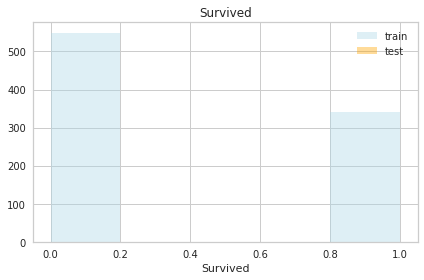


# Correlation


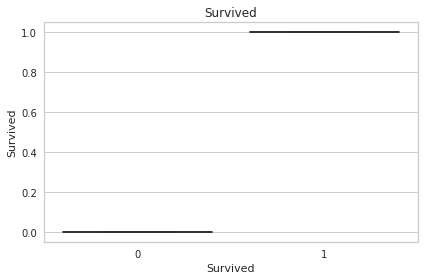


------------------------------------------------------------


In [36]:
eda_numerical_feature(eda_df, col=Y_COL, target_col=Y_COL)

## Feature analysis

In [37]:
all_cols = eda_df.columns
ignore_cols = [ID_COL, Y_COL, 'flg']
col_dtypes_dict = eda_df.dtypes.to_dict()

# 特徴量となるカラム
# feature_cols = [c for c in all_cols if not c in ignore_cols]

# 数値型とカテゴリ型のカラムに分ける
numerical_cols = []
categorical_cols = []
for k, v in col_dtypes_dict.items():
    # 特徴量にならないカラムはスキップ
    if k in ignore_cols:
        continue
    # 型を見て数値型かカテゴリ型か判断
    if str(v) == 'object':
        categorical_cols.append(k)
    else:
        numerical_cols.append(k)

print('# Numerical')
print(numerical_cols)
print('# Categorical')
print(categorical_cols)

# Numerical
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
# Categorical
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### Numerical

# About [Pclass]
# Distribution


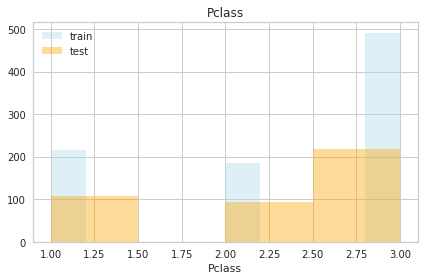


# Correlation


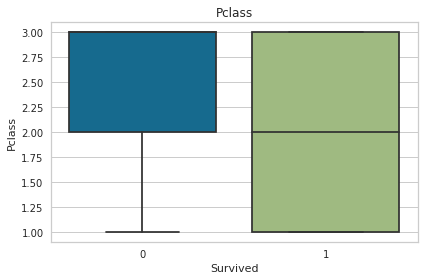


------------------------------------------------------------
# About [Age]
# Distribution


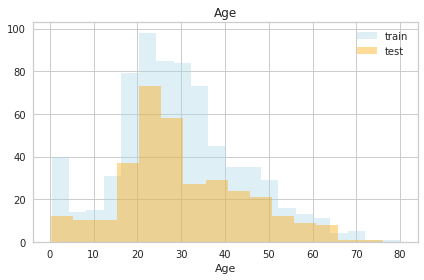


# Correlation


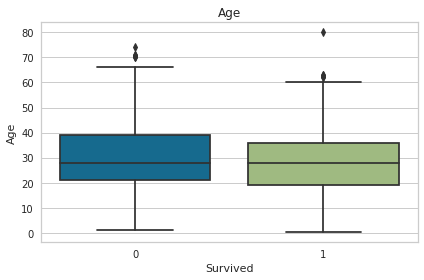


------------------------------------------------------------
# About [SibSp]
# Distribution


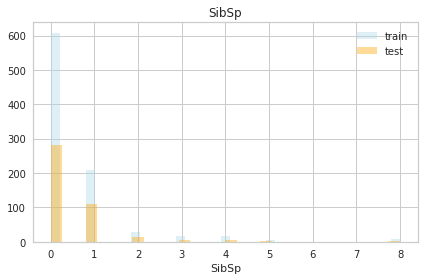


# Correlation


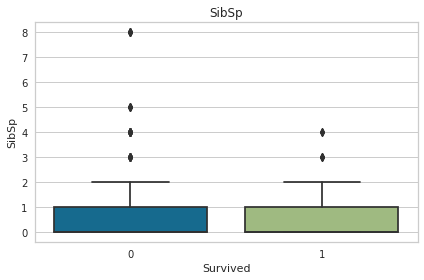


------------------------------------------------------------
# About [Parch]
# Distribution


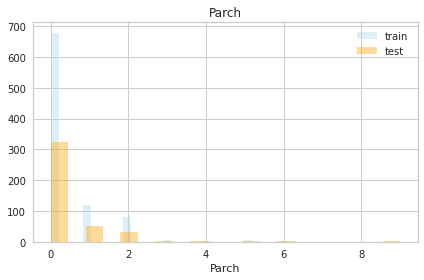


# Correlation


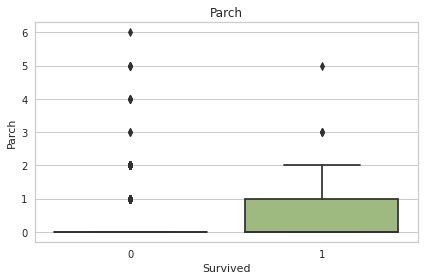


------------------------------------------------------------
# About [Fare]
# Distribution


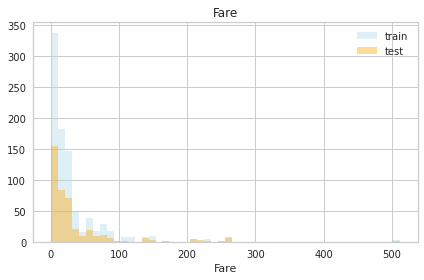


# Correlation


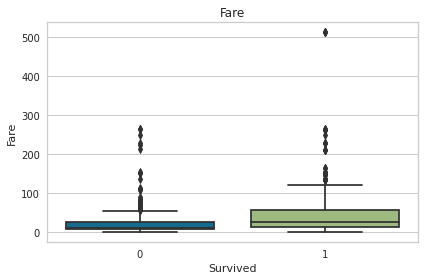


------------------------------------------------------------


In [38]:
for c in numerical_cols:
    eda_numerical_feature(eda_df, col=c, target_col=Y_COL, problem_type=PROBLEM_TYPE)

### Categorical

# About [Name]
Skip because of too many classes (1307).
------------------------------------------------------------
# About [Sex]
# Category Distribution


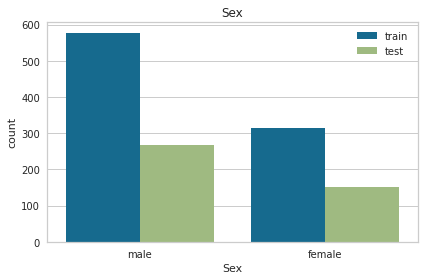

------------------------------------------------------------
Correlation


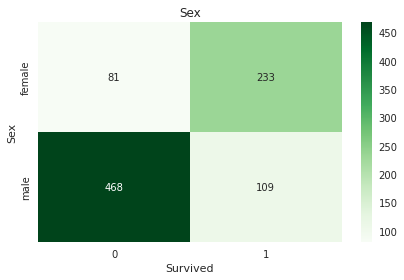


------------------------------------------------------------
# About [Ticket]
Skip because of too many classes (929).
------------------------------------------------------------
# About [Cabin]
Skip because of too many classes (187).
------------------------------------------------------------
# About [Embarked]
# Category Distribution


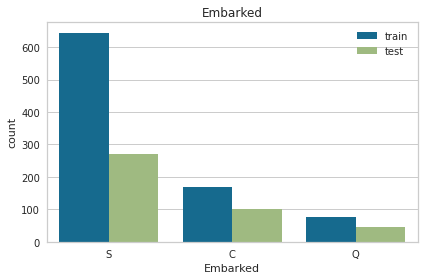

------------------------------------------------------------
Correlation


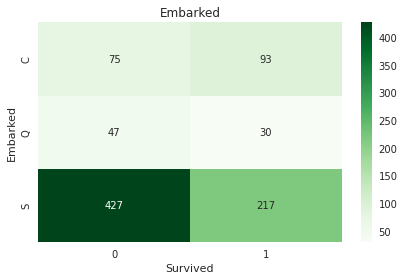


------------------------------------------------------------


In [39]:
for c in categorical_cols:
    eda_categorical_feature(eda_df, col=c, id_col=ID_COL, target_col=Y_COL, problem_type=PROBLEM_TYPE)

- Name
- Ticket
- Cabin

#### Name

In [40]:
set(eda_df['Name'])

{'Beavan, Mr. William Thomas',
 'Gibson, Mrs. Leonard (Pauline C Boeson)',
 'Lundahl, Mr. Johan Svensson',
 'Moutal, Mr. Rahamin Haim',
 'Harbeck, Mr. William H',
 'Cacic, Miss. Manda',
 'Padro y Manent, Mr. Julian',
 'Lulic, Mr. Nikola',
 'Nicholls, Mr. Joseph Charles',
 'Becker, Miss. Marion Louise',
 'Otter, Mr. Richard',
 'Samaan, Mr. Hanna',
 'Andrew, Mr. Frank Thomas',
 'Healy, Miss. Hanora "Nora"',
 'Ivanoff, Mr. Kanio',
 'Collyer, Miss. Marjorie "Lottie"',
 'del Carlo, Mrs. Sebastiano (Argenia Genovesi)',
 'Boulos, Mrs. Joseph (Sultana)',
 'Franklin, Mr. Charles (Charles Fardon)',
 'Elias, Mr. Dibo',
 'Minahan, Dr. William Edward',
 'Dakic, Mr. Branko',
 'Fillbrook, Mr. Joseph Charles',
 'Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)',
 'Nicola-Yarred, Miss. Jamila',
 'Nilsson, Miss. Helmina Josefina',
 'Hegarty, Miss. Hanora "Nora"',
 'Walcroft, Miss. Nellie',
 'van Melkebeke, Mr. Philemon',
 'McNamee, Mr. Neal',
 'Somerton, Mr. Francis William',
 'de Messemaeker, Mr. Guillau

#### Ticket

以下が効きそう？
- Ticketの文字数
- 最初の2文字

In [41]:
set(eda_df['Ticket'])

{'110152',
 '110413',
 '110465',
 '110469',
 '110489',
 '110564',
 '110813',
 '111163',
 '111240',
 '111320',
 '111361',
 '111369',
 '111426',
 '111427',
 '111428',
 '112050',
 '112051',
 '112052',
 '112053',
 '112058',
 '112059',
 '112277',
 '112377',
 '112378',
 '112379',
 '112901',
 '113028',
 '113038',
 '113043',
 '113044',
 '113050',
 '113051',
 '113054',
 '113055',
 '113056',
 '113059',
 '113501',
 '113503',
 '113505',
 '113509',
 '113510',
 '113514',
 '113572',
 '113760',
 '113767',
 '113773',
 '113776',
 '113778',
 '113780',
 '113781',
 '113783',
 '113784',
 '113786',
 '113787',
 '113788',
 '113789',
 '113790',
 '113791',
 '113792',
 '113794',
 '113795',
 '113796',
 '113798',
 '113800',
 '113801',
 '113803',
 '113804',
 '113806',
 '113807',
 '11668',
 '11751',
 '11752',
 '11753',
 '11755',
 '11765',
 '11767',
 '11769',
 '11770',
 '11771',
 '11774',
 '11778',
 '11813',
 '11967',
 '1222',
 '12233',
 '12460',
 '12749',
 '13049',
 '13050',
 '13213',
 '13214',
 '13236',
 '13502',
 '

# About [len_ticket]
# Distribution


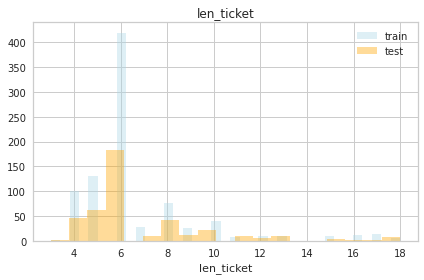


# Correlation


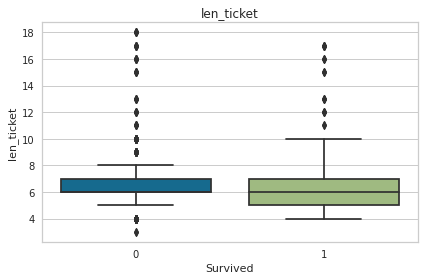


------------------------------------------------------------


In [44]:
#  Ticketの文字数
eda_df['len_ticket'] = eda_df['Ticket'].map(lambda x: len(x))
eda_numerical_feature(eda_df, col='len_ticket', target_col=Y_COL, problem_type=PROBLEM_TYPE)

# About [first_char_ticket]
# Category Distribution


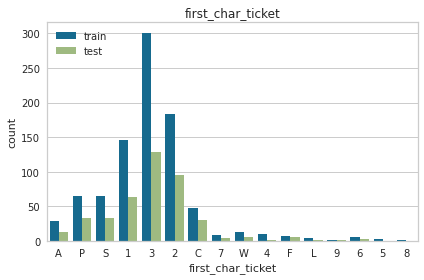

------------------------------------------------------------
Correlation


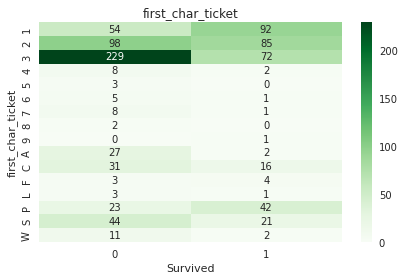


------------------------------------------------------------


In [47]:
# 最初の2文字
eda_df['first_char_ticket'] = eda_df['Ticket'].map(lambda x: str(x)[:1])
eda_categorical_feature(eda_df, col='first_char_ticket', id_col=ID_COL, target_col=Y_COL, problem_type=PROBLEM_TYPE)

#### Cabin

- 文字数
- 最初の1文字
- 欠損値は'-1'とする

In [48]:
set(eda_df['Cabin'])

{'A10',
 'A11',
 'A14',
 'A16',
 'A18',
 'A19',
 'A20',
 'A21',
 'A23',
 'A24',
 'A26',
 'A29',
 'A31',
 'A32',
 'A34',
 'A36',
 'A5',
 'A6',
 'A7',
 'A9',
 'B10',
 'B101',
 'B102',
 'B11',
 'B18',
 'B19',
 'B20',
 'B22',
 'B24',
 'B26',
 'B28',
 'B3',
 'B30',
 'B35',
 'B36',
 'B37',
 'B38',
 'B39',
 'B4',
 'B41',
 'B42',
 'B45',
 'B49',
 'B5',
 'B50',
 'B51 B53 B55',
 'B52 B54 B56',
 'B57 B59 B63 B66',
 'B58 B60',
 'B61',
 'B69',
 'B71',
 'B73',
 'B77',
 'B78',
 'B79',
 'B80',
 'B82 B84',
 'B86',
 'B94',
 'B96 B98',
 'C101',
 'C103',
 'C104',
 'C105',
 'C106',
 'C110',
 'C111',
 'C116',
 'C118',
 'C123',
 'C124',
 'C125',
 'C126',
 'C128',
 'C130',
 'C132',
 'C148',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C28',
 'C30',
 'C31',
 'C32',
 'C39',
 'C45',
 'C46',
 'C47',
 'C49',
 'C50',
 'C51',
 'C52',
 'C53',
 'C54',
 'C55 C57',
 'C6',
 'C62 C64',
 'C65',
 'C68',
 'C7',
 'C70',
 'C78',
 'C80',
 'C82',
 'C83',
 'C85',
 'C86',
 'C87',
 'C89',
 'C90',
 'C91',
 'C92',
 'C93',
 'C95',
 'C97',
 'C

In [49]:
eda_df['fix_Cabin'] = eda_df['Cabin'].fillna('-1')

# About [len_Cabin]
# Distribution


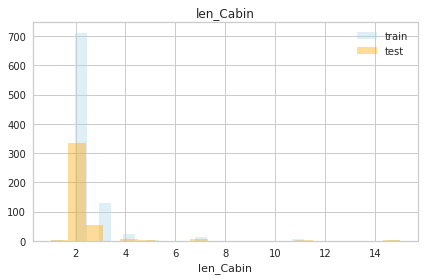


# Correlation


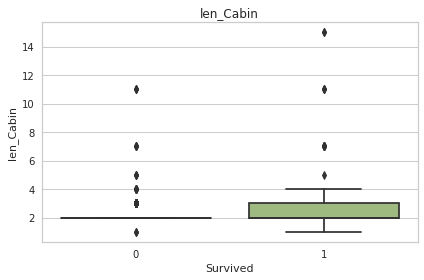


------------------------------------------------------------


In [50]:
eda_df['len_Cabin'] = eda_df['fix_Cabin'].map(lambda x: len(str(x)))
eda_numerical_feature(eda_df, col='len_Cabin', target_col=Y_COL, problem_type=PROBLEM_TYPE)

# About [first_char_Cabin]
# Category Distribution


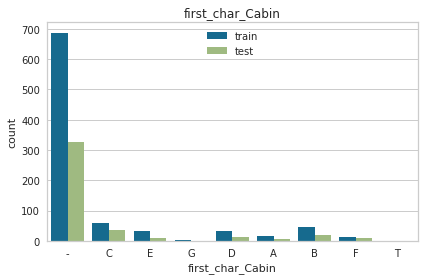

------------------------------------------------------------
Correlation


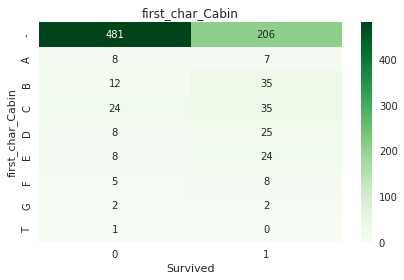


------------------------------------------------------------


In [52]:
eda_df['first_char_Cabin'] = eda_df['fix_Cabin'].map(lambda x: str(x)[0])
eda_categorical_feature(eda_df, col='first_char_Cabin', id_col=ID_COL, target_col=Y_COL, problem_type=PROBLEM_TYPE)

# Baseline model #2

In [53]:
drop_cols = [ID_COL, 'Name', 'Ticket', 'Cabin']
train_df = base_train_df.drop(drop_cols, axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [57]:
s = setup(train_df, 
          target = Y_COL,
          session_id=0,
          fold=5,
          normalize = True, 
          transformation = True, 
          ignore_low_variance = True,
          remove_multicollinearity = True, 
          multicollinearity_threshold = 0.95,)

,Description,Value
0,session_id,0
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 8)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [58]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8155,0.8514,0.7272,0.7838,0.7534,0.6064,0.6085,0.8920
gbc,Gradient Boosting Classifier,0.8090,0.8614,0.6810,0.7994,0.7320,0.5856,0.5929,0.0360
lightgbm,Light Gradient Boosting Machine,0.8074,0.8545,0.7106,0.7786,0.7414,0.5886,0.5918,0.0240
ridge,Ridge Classifier,0.8010,0.0000,0.6859,0.7755,0.7270,0.5716,0.5750,0.0060
lda,Linear Discriminant Analysis,0.8010,0.8463,0.6901,0.7724,0.7280,0.5721,0.5751,0.0080
ada,Ada Boost Classifier,0.7914,0.8201,0.7147,0.7401,0.7266,0.5580,0.5589,0.0420
dt,Decision Tree Classifier,0.7817,0.7779,0.7194,0.7202,0.7179,0.5402,0.5420,0.0100
knn,K Neighbors Classifier,0.7737,0.8240,0.6609,0.7364,0.6942,0.5156,0.5197,0.0180
rf,Random Forest Classifier,0.7577,0.8342,0.6733,0.6947,0.6820,0.4866,0.4884,0.2180
et,Extra Trees Classifier,0.7528,0.7939,0.6735,0.6836,0.6779,0.4775,0.4781,0.1940


In [179]:
# gbc = create_model('gbc', fold=5)

In [180]:
# tuned_rf = tune_model(gbc, optimize = 'F1')